# Results

In this notebook we collect the result of the application of the genetic algorithm to hyperparameters tuning and we compare these with the more popular Bayesian optimization.

Since we used the platform Weight & Biases to log the results, we can easily retrieve the information by using the API.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from retrievement import *
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import acorr_ljungbox

import wandb
api = wandb.Api()

## Collect all runs' data

We can distinguish the different categories of runs by filtering out the tags, like `sinewave` or `mnist`.

In [6]:
runs = api.runs(path, filters=Filter.MLP_MNIST)
runs = list(runs)
print(f"Found {len(runs)} runs")

Found 101 runs


In [7]:
df = dict()
for run in runs:
    generation = int(run.name.split('-')[1])
    df = get_metrics(df, run, generation)
df = pd.DataFrame.from_dict(df, orient='index')

display(df.head())

,dropout,n_layers,input_size,hidden_size,output_size,activation_function,generation,val_mse,val_mae,val_R2
fitness-1-1,0.137515,1,784,19,1,Sigmoid,1,2.895627,1.316145,0.651589
fitness-1-2,0.051248,2,784,33,1,Sigmoid,1,3.348876,1.460464,0.597054
fitness-1-3,0.210961,5,784,27,1,Tanh,1,2.992290,1.334934,0.639966
fitness-1-4,0.116330,1,784,27,1,LeakyReLU,1,2.475996,1.178020,0.702031
fitness-1-5,0.099419,5,784,19,1,Tanh,1,2.547639,1.207145,0.693508


### Hyperparameters evolution

We now check the evolution of the hyperparameters during the optimization process.
Ideally we would like to see the hyperparameters converging to a specific value. 
We first visualize the data and then we perform convergence tests.

In [8]:
cols = ['n_layers', 'hidden_size', 'dropout']
mean, std, best_values = plot_metrics_evolution(
    df = df,
    cols = cols,
)
best = df[df['val_mse'] == df['val_mse'].min()]

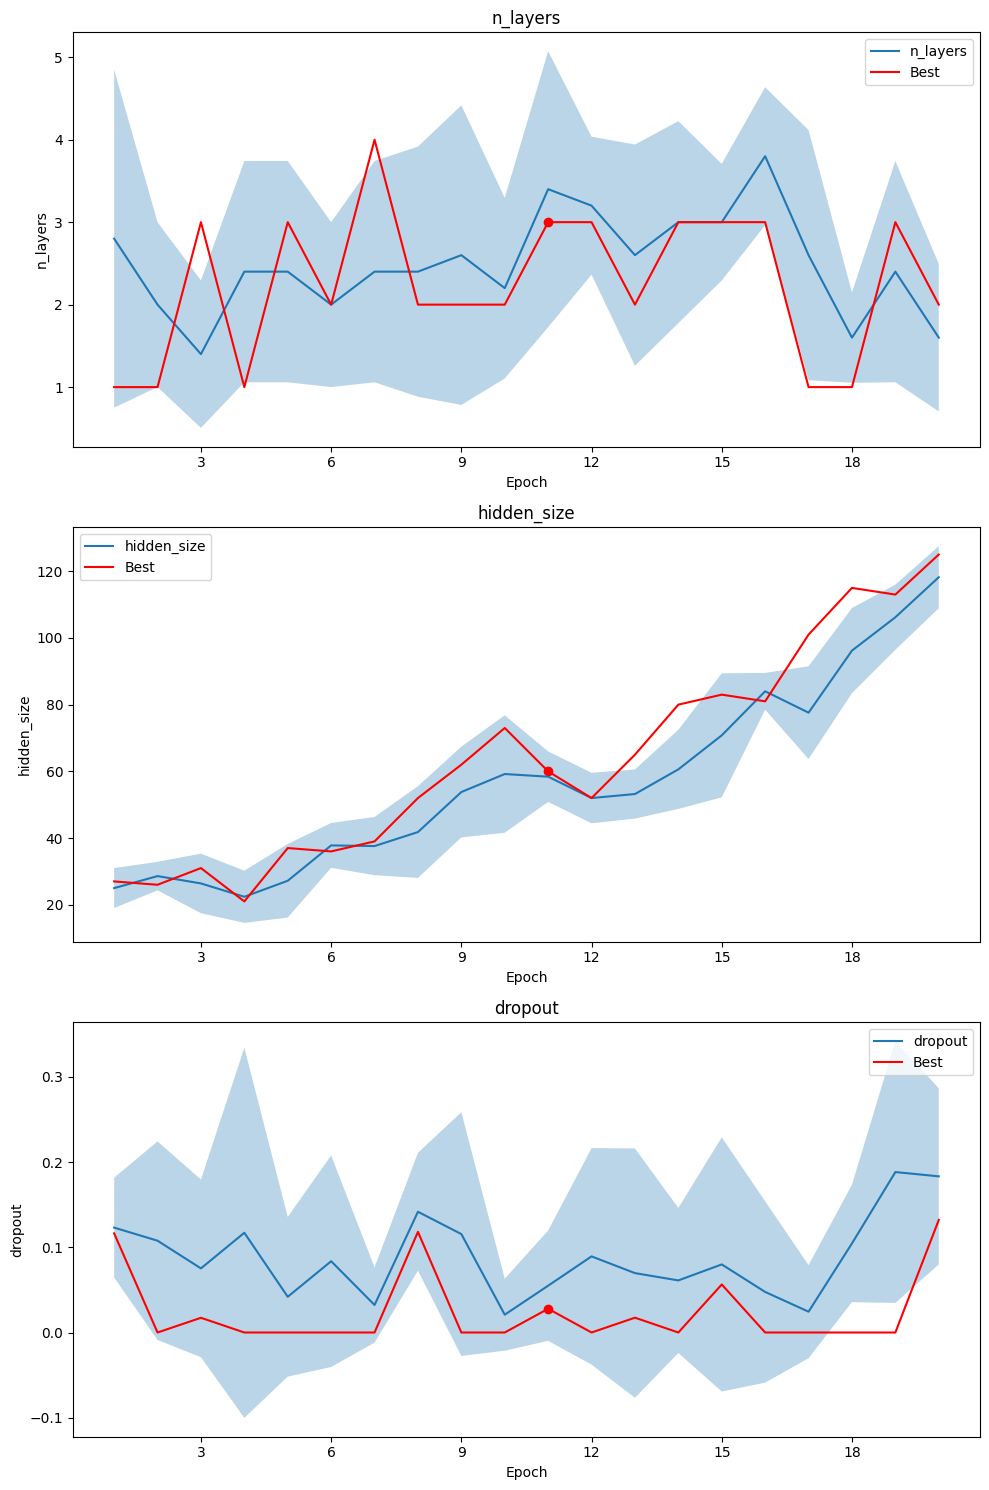

In [9]:
fig, ax = plt.subplots(nrows=len(cols), ncols=1, figsize=(10, 5*len(cols)))
for i, metric in enumerate(cols):
    ax[i].plot(mean[metric], label=metric)
    ax[i].fill_between(mean.index, mean[metric] - std[metric], mean[metric] + std[metric], alpha=0.3)
    ax[i].plot(mean.index, best_values[metric], color='red', label='Best')
    
    # Add the best value as a scatter point
    ax[i].scatter(best['generation'], best[metric], color='red')
    
    ax[i].set_title(metric)
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel(metric)
    ax[i].legend()
    
    # Set x-axis to show every tick as an integer
    ax[i].xaxis.set_major_locator(MaxNLocator(integer=True, prune=None))  # Ensures all integer ticks are shown

plt.tight_layout()
plt.show()

### Metrics evolution

In [10]:
cols = ['val_mse', 'val_R2']
mean, std, best_values = plot_metrics_evolution(
    df = df,
    cols = cols,
)
best = df[df['val_mse'] == df['val_mse'].min()]

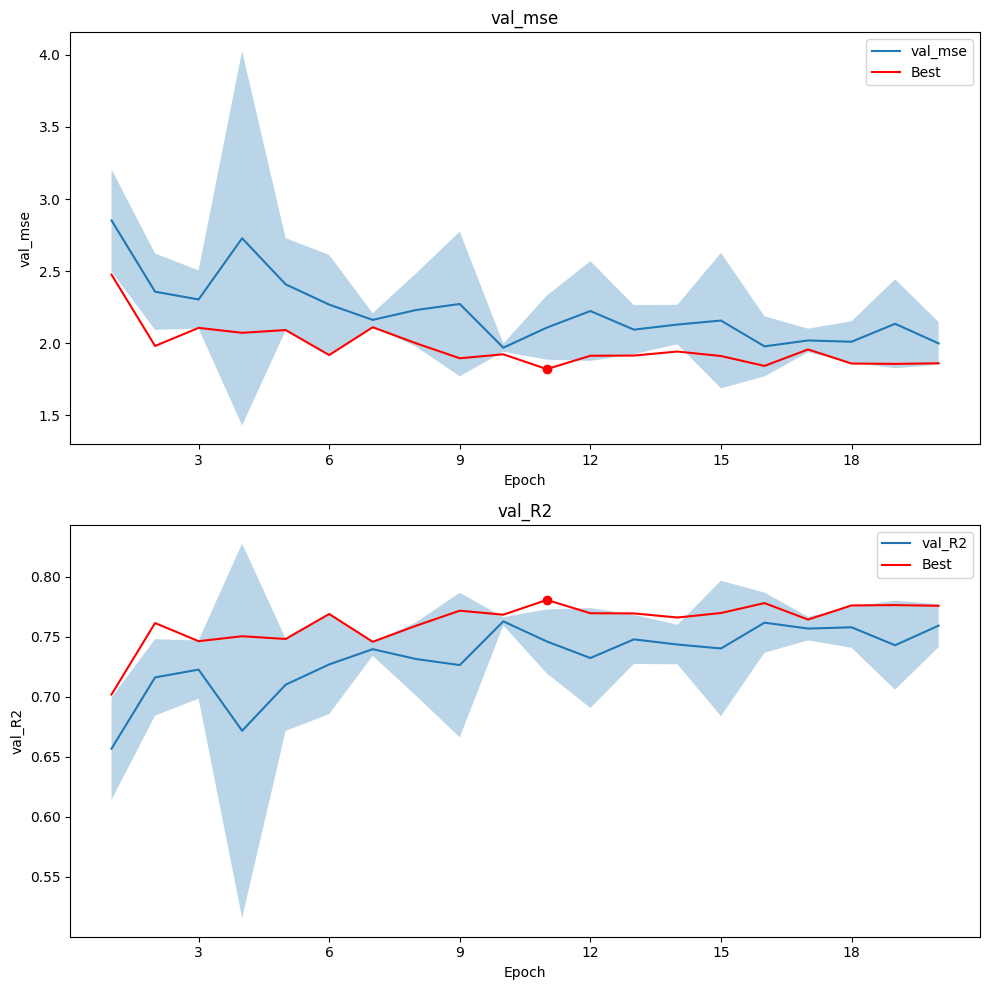

In [11]:
fig, ax = plt.subplots(nrows=len(cols), ncols=1, figsize=(10, 5*len(cols)))
for i, metric in enumerate(cols):
    ax[i].plot(mean[metric], label=metric)
    ax[i].fill_between(mean.index, mean[metric] - std[metric], mean[metric] + std[metric], alpha=0.3)
    ax[i].plot(mean.index, best_values[metric], color='red', label='Best')
    # Add the best value as a scatter point
    ax[i].scatter(best['generation'], best[metric], color='red')
    
    ax[i].set_title(metric)
    ax[i].set_xlabel('Epoch')
    ax[i].set_ylabel(metric)
    ax[i].legend()
    
    # Set x-axis to integer ticks with step size of 1
    ax[i].xaxis.set_major_locator(MaxNLocator(integer=True, prune=None))
    
plt.tight_layout()
plt.show()